# Stacked Autoencoder

<img src="./AE.png" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

D:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# In order to run this, you'll need to provide your own path
# If you don't have mnist downloaded tensorflow will do it for you. No worries :)
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
tf.reset_default_graph() 

## Parameters

In [6]:
num_inputs = 784 # 28x28
num_hid1 = 392
num_hid2 = 196
num_hid3 = num_hid1 #decoder begins
num_outputs = num_inputs

lr = 0.05

** Activation function **

In [7]:
actf = tf.nn.relu

### Placeholder

In [8]:
X = tf.placeholder(dtype=tf.float32, shape=(None, num_inputs))

# Used for the decode-only process
X_decode = tf.placeholder(dtype=tf.float32, shape=(None, num_hid2))

### Weights

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [9]:
initializer = tf.variance_scaling_initializer(0.5)

In [10]:
w1 = tf.Variable(initializer(shape=[num_inputs, num_hid1]), dtype=tf.float32) # input to hidden1 & hidden3 to output
w2 = tf.Variable(initializer(shape=[num_hid1, num_hid2]), dtype=tf.float32)   # hidden1 to hidden2 & hidden2 to hidden3

### Biases

In [11]:
b1 = tf.Variable(tf.zeros(shape=[num_hid1]))
b2 = tf.Variable(tf.zeros(shape=[num_hid2]))
b3 = tf.Variable(tf.zeros(shape=[num_hid3]))
b4 = tf.Variable(tf.zeros(shape=[num_outputs]))

### Activation Function and Layers

In [12]:
act_func = tf.nn.relu

A common technique for autoencoders is to use the same weights for the decoder as for the encoder, because the goal of the output is actually to mimic the input as close as possible. 

We need to use the transpose of the encoder weights for the decoder, as it's the same mirrored.

In [13]:
# Full feed-forward (encode + decode)
hid_layer1 = actf(tf.matmul(X, w1) + b1) # encoder begins
hid_layer2 = actf(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = actf(tf.matmul(hid_layer2, tf.transpose(w2)) + b3) #decoder begins
output = tf.matmul(hid_layer3, tf.transpose(w1)) + b4

# Used to just decode images
hid_layer1_decode = actf(tf.matmul(X_decode, tf.transpose(w2)) + b3)
output_decode = tf.matmul(hid_layer1_decode, tf.transpose(w1)) + b4

### Loss Function

##### Mean squared error


# $$ mse=\frac{1}{n} \sum_{i=1}^n (Y_i - Ý_i)^2 $$

We use X instead of Y as the desired output, because the autoencoders goal is to mimic the input

In [14]:
loss = tf.reduce_mean(tf.square(output - X))

### Optimizer

The Adagrad Optimizer actually worked the best

In [15]:
#optmizer = tf.train.RMSPropOptimizer(learning_rate=lr)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
optimizer = tf.train.AdagradOptimizer(learning_rate=lr)
#optimizer = tf.train.AdadeltaOptimizer(learning_rate=lr)
train = optimizer.minimize(loss)

In [16]:
train = optimizer.minimize(loss)

### Intialize Variables

In [17]:
init = tf.global_variables_initializer()

In [18]:
saver = tf.train.Saver() 

EPOCH: 0 LOSS: 0.07629210651531572


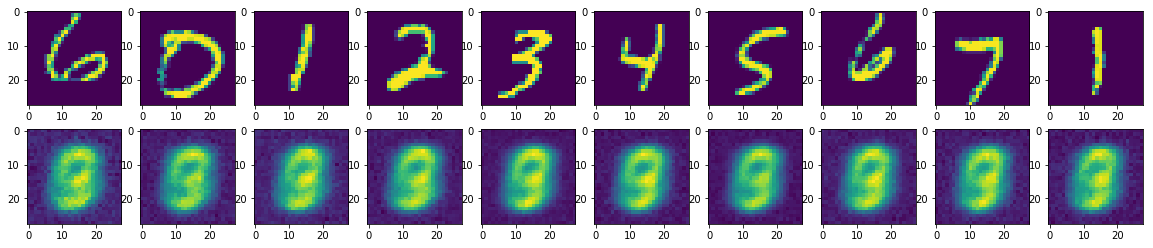

EPOCH: 1 LOSS: 0.05973376957648765
EPOCH: 2 LOSS: 0.05551424871906231
EPOCH: 3 LOSS: 0.049527867081386796
EPOCH: 4 LOSS: 0.044534294290946484
EPOCH: 5 LOSS: 0.04115696552672673
EPOCH: 6 LOSS: 0.038658655274028335
EPOCH: 7 LOSS: 0.036552621041490735
EPOCH: 8 LOSS: 0.034707068236636336
EPOCH: 9 LOSS: 0.03310449163892556
EPOCH: 10 LOSS: 0.031696236982453066
EPOCH: 11 LOSS: 0.030466114715393122
EPOCH: 12 LOSS: 0.02936566045986173
EPOCH: 13 LOSS: 0.028316710948374103
EPOCH: 14 LOSS: 0.02736469378562573
EPOCH: 15 LOSS: 0.026481397602646076
EPOCH: 16 LOSS: 0.025682427665941376
EPOCH: 17 LOSS: 0.024902350874872154
EPOCH: 18 LOSS: 0.024207239970564842
EPOCH: 19 LOSS: 0.023571433290798482
EPOCH: 20 LOSS: 0.022952435024164088
EPOCH: 21 LOSS: 0.022381311058590973
EPOCH: 22 LOSS: 0.021864332273968907
EPOCH: 23 LOSS: 0.021319943978934667
EPOCH: 24 LOSS: 0.020844250235482642
EPOCH: 25 LOSS: 0.020389919316833788


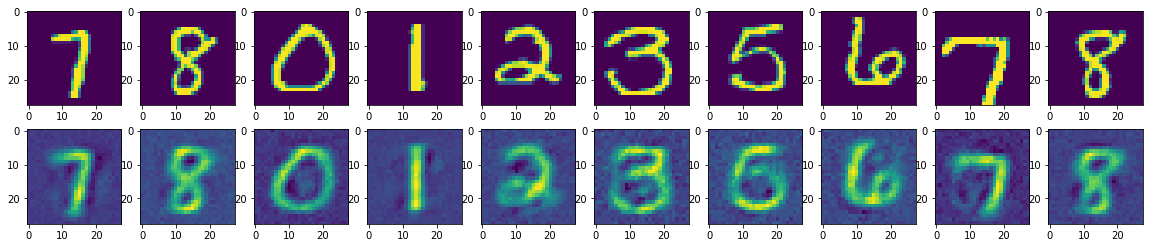

EPOCH: 26 LOSS: 0.019936930820793727
EPOCH: 27 LOSS: 0.019547452335882058
EPOCH: 28 LOSS: 0.019141661084659114
EPOCH: 29 LOSS: 0.018766474253574354
EPOCH: 30 LOSS: 0.018404282588776345
EPOCH: 31 LOSS: 0.018062318827895843
EPOCH: 32 LOSS: 0.01774535047226265
EPOCH: 33 LOSS: 0.017427677181778383
EPOCH: 34 LOSS: 0.01712160351141636
EPOCH: 35 LOSS: 0.016814192497461546
EPOCH: 36 LOSS: 0.016536364708441855
EPOCH: 37 LOSS: 0.016278550074603715
EPOCH: 38 LOSS: 0.015996343560537193
EPOCH: 39 LOSS: 0.015758723366618807
EPOCH: 40 LOSS: 0.015512333628136277
EPOCH: 41 LOSS: 0.015275459487215091
EPOCH: 42 LOSS: 0.015057122253410804
EPOCH: 43 LOSS: 0.01486547080586191
EPOCH: 44 LOSS: 0.014636496995458674
EPOCH: 45 LOSS: 0.014446600599855672
EPOCH: 46 LOSS: 0.01426058167927578
EPOCH: 47 LOSS: 0.0140812352345493
EPOCH: 48 LOSS: 0.013906188726506598
EPOCH: 49 LOSS: 0.013743101909268097
EPOCH: 50 LOSS: 0.013563452573503302


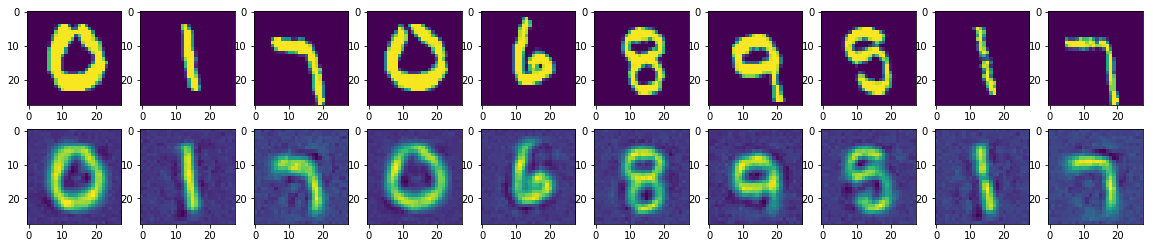

EPOCH: 51 LOSS: 0.013417627642063496
EPOCH: 52 LOSS: 0.013262922824691228
EPOCH: 53 LOSS: 0.013116876373342315
EPOCH: 54 LOSS: 0.012978405808734763
EPOCH: 55 LOSS: 0.012824842813195752
EPOCH: 56 LOSS: 0.01271322579759229
EPOCH: 57 LOSS: 0.012569744483430366
EPOCH: 58 LOSS: 0.01245862884508049
EPOCH: 59 LOSS: 0.012313285964678546
EPOCH: 60 LOSS: 0.012209835380845057
EPOCH: 61 LOSS: 0.012093531629426883
EPOCH: 62 LOSS: 0.01196299655658137
EPOCH: 63 LOSS: 0.01186734440487102
EPOCH: 64 LOSS: 0.011767781372665544
EPOCH: 65 LOSS: 0.011659307728516437
EPOCH: 66 LOSS: 0.011556529745337416
EPOCH: 67 LOSS: 0.011446992879417913
EPOCH: 68 LOSS: 0.011346417581000941
EPOCH: 69 LOSS: 0.011264694238824596
EPOCH: 70 LOSS: 0.01117598940745566
EPOCH: 71 LOSS: 0.011084206616047953
EPOCH: 72 LOSS: 0.010978320972291662
EPOCH: 73 LOSS: 0.010919332036066577
EPOCH: 74 LOSS: 0.01082111455632445
EPOCH: 75 LOSS: 0.01074790085100981


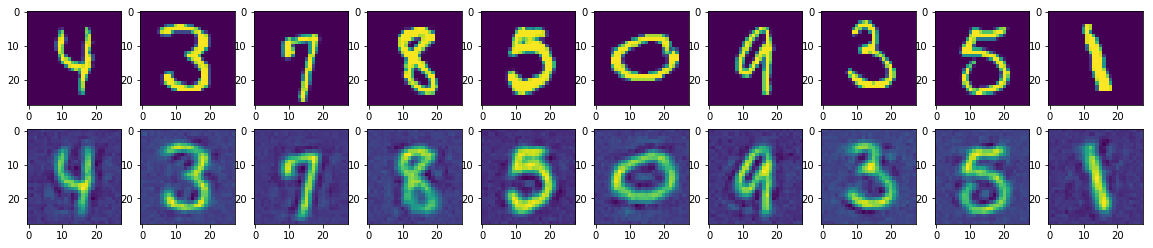

EPOCH: 76 LOSS: 0.010633905634507944
EPOCH: 77 LOSS: 0.010610790386327791
EPOCH: 78 LOSS: 0.010499686025632698
EPOCH: 79 LOSS: 0.010435756977871467
EPOCH: 80 LOSS: 0.01036713633920407
EPOCH: 81 LOSS: 0.010293583477251842
EPOCH: 82 LOSS: 0.010217854727690663
EPOCH: 83 LOSS: 0.010145916364313475
EPOCH: 84 LOSS: 0.0100835402206075
EPOCH: 85 LOSS: 0.010027930746109434
EPOCH: 86 LOSS: 0.009950040849790873
EPOCH: 87 LOSS: 0.009879656118223739
EPOCH: 88 LOSS: 0.009838542900979519
EPOCH: 89 LOSS: 0.00976672077734695
EPOCH: 90 LOSS: 0.009720486194363546
EPOCH: 91 LOSS: 0.009641611024920569
EPOCH: 92 LOSS: 0.009610084928775745
EPOCH: 93 LOSS: 0.009517555473667514
EPOCH: 94 LOSS: 0.009483234710034615
EPOCH: 95 LOSS: 0.009422633204039165
EPOCH: 96 LOSS: 0.00938401949627559
EPOCH: 97 LOSS: 0.009309918222735162
EPOCH: 98 LOSS: 0.009265982848719332
EPOCH: 99 LOSS: 0.009221151766311275
EPOCH: 100 LOSS: 0.009154457308840557


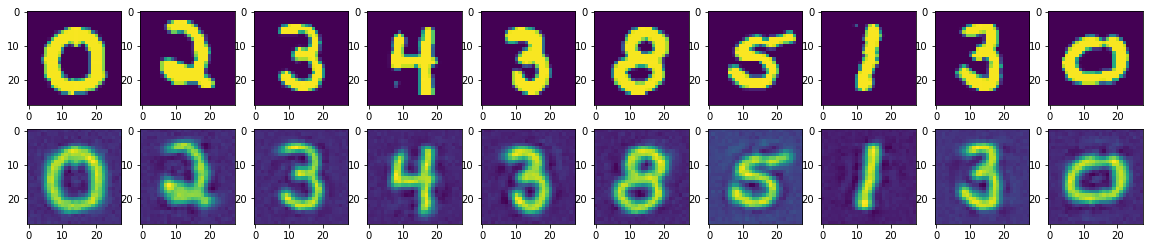

EPOCH: 101 LOSS: 0.009128954823897348
EPOCH: 102 LOSS: 0.009070600021650882
EPOCH: 103 LOSS: 0.00901279963115281
EPOCH: 104 LOSS: 0.008975916646441312
EPOCH: 105 LOSS: 0.008922770375111064
EPOCH: 106 LOSS: 0.0088683481842198
EPOCH: 107 LOSS: 0.008840098954187553
EPOCH: 108 LOSS: 0.00879146401195334
EPOCH: 109 LOSS: 0.008739717037523867
EPOCH: 110 LOSS: 0.008708558124210177
EPOCH: 111 LOSS: 0.008645447334936244
EPOCH: 112 LOSS: 0.008623721331225636
EPOCH: 113 LOSS: 0.008574126252670431
EPOCH: 114 LOSS: 0.008529572925769566
EPOCH: 115 LOSS: 0.008505202887091235
EPOCH: 116 LOSS: 0.00843124906786926
EPOCH: 117 LOSS: 0.008425205433232292
EPOCH: 118 LOSS: 0.008356251232224247
EPOCH: 119 LOSS: 0.008342310005055914
EPOCH: 120 LOSS: 0.008288612743188204
EPOCH: 121 LOSS: 0.008243244740592896
EPOCH: 122 LOSS: 0.008230202888581352
EPOCH: 123 LOSS: 0.008189085328982014
EPOCH: 124 LOSS: 0.00814332108171097
EPOCH: 125 LOSS: 0.008117929120074774


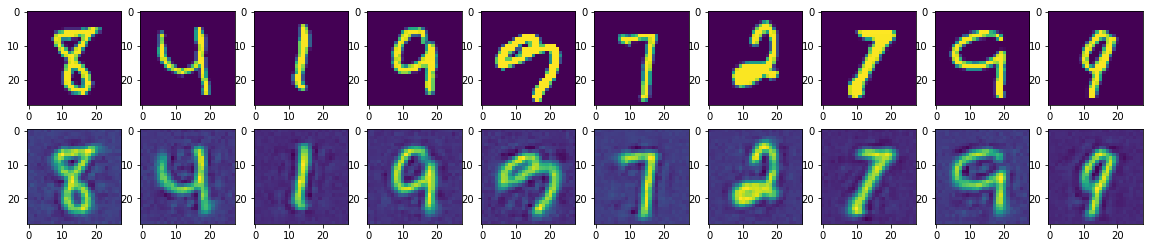

EPOCH: 126 LOSS: 0.008074718986795655
EPOCH: 127 LOSS: 0.008046952435044481
EPOCH: 128 LOSS: 0.008005536427273531
EPOCH: 129 LOSS: 0.007977159359222634
EPOCH: 130 LOSS: 0.007946446223713743
EPOCH: 131 LOSS: 0.007901278171749388
EPOCH: 132 LOSS: 0.007877208825577397
EPOCH: 133 LOSS: 0.007853133568306112
EPOCH: 134 LOSS: 0.007802568826458005
EPOCH: 135 LOSS: 0.0077795739949787735
EPOCH: 136 LOSS: 0.007769331431443818
EPOCH: 137 LOSS: 0.007711195521809853
EPOCH: 138 LOSS: 0.007698283881926146
EPOCH: 139 LOSS: 0.0076619379904345085
EPOCH: 140 LOSS: 0.007637127901839673
EPOCH: 141 LOSS: 0.007602652910170578
EPOCH: 142 LOSS: 0.007579097841087667
EPOCH: 143 LOSS: 0.007557479531091989
EPOCH: 144 LOSS: 0.007493318693427359
EPOCH: 145 LOSS: 0.0075067173412242715
EPOCH: 146 LOSS: 0.007484394245236461
EPOCH: 147 LOSS: 0.0074307199458138705
EPOCH: 148 LOSS: 0.00742683268299764
EPOCH: 149 LOSS: 0.0073677440634496065
EPOCH: 150 LOSS: 0.007367765915178047


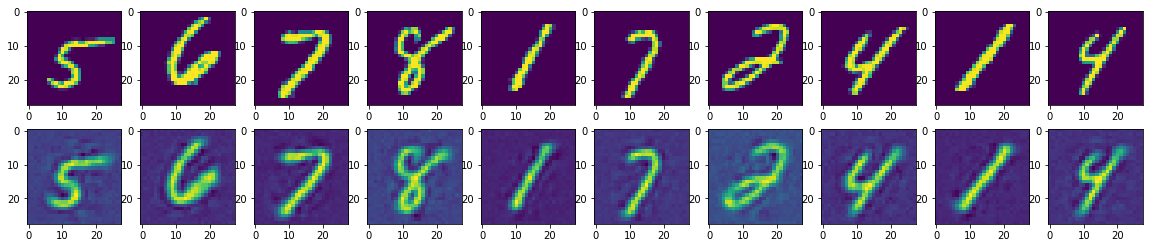

EPOCH: 151 LOSS: 0.007325021327407063
EPOCH: 152 LOSS: 0.007321959669330244
EPOCH: 153 LOSS: 0.007285141378457918
EPOCH: 154 LOSS: 0.007263161392139444
EPOCH: 155 LOSS: 0.007239441372087744
EPOCH: 156 LOSS: 0.007206894013308029
EPOCH: 157 LOSS: 0.00718952369458892
EPOCH: 158 LOSS: 0.007173715921403851
EPOCH: 159 LOSS: 0.0071309938431396835
EPOCH: 160 LOSS: 0.007128931374589358
EPOCH: 161 LOSS: 0.0070822130611339395
EPOCH: 162 LOSS: 0.007084238709362804
EPOCH: 163 LOSS: 0.007046313658662018
EPOCH: 164 LOSS: 0.00703397694379702
EPOCH: 165 LOSS: 0.007008394645018086
EPOCH: 166 LOSS: 0.006975214191727707
EPOCH: 167 LOSS: 0.006966204857046568
EPOCH: 168 LOSS: 0.006953245376190934
EPOCH: 169 LOSS: 0.00692614384728377
EPOCH: 170 LOSS: 0.0068905652256407695
EPOCH: 171 LOSS: 0.006898437522331385
EPOCH: 172 LOSS: 0.006943802523574298
EPOCH: 173 LOSS: 0.006833111117924741
EPOCH: 174 LOSS: 0.0068294094274929966
EPOCH: 175 LOSS: 0.0068140370794190245


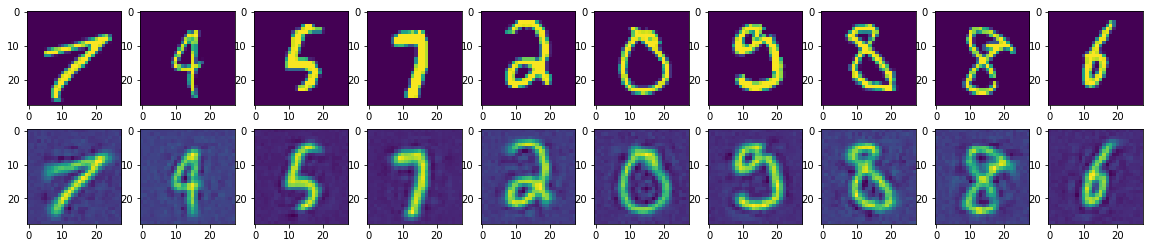

EPOCH: 176 LOSS: 0.006827206878866898
EPOCH: 177 LOSS: 0.006813034553925603
EPOCH: 178 LOSS: 0.006741386852252598
EPOCH: 179 LOSS: 0.006717686859453148
EPOCH: 180 LOSS: 0.006848799230154258
EPOCH: 181 LOSS: 0.006688776618134373
EPOCH: 182 LOSS: 0.006667481293861088
EPOCH: 183 LOSS: 0.006710520916226538
EPOCH: 184 LOSS: 0.006671380597711261
EPOCH: 185 LOSS: 0.006615682760803181
EPOCH: 186 LOSS: 0.0066389266281933245
EPOCH: 187 LOSS: 0.0066185077980588205
EPOCH: 188 LOSS: 0.0066246268176600905
EPOCH: 189 LOSS: 0.006542152573756589
EPOCH: 190 LOSS: 0.0065787142559967406
EPOCH: 191 LOSS: 0.006567303144724154
EPOCH: 192 LOSS: 0.00649354862598855
EPOCH: 193 LOSS: 0.006481283259084397
EPOCH: 194 LOSS: 0.006620717822711487
EPOCH: 195 LOSS: 0.006447309145927837
EPOCH: 196 LOSS: 0.006433187267625999
EPOCH: 197 LOSS: 0.006524256106130168
EPOCH: 198 LOSS: 0.006406349814471488
EPOCH: 199 LOSS: 0.006402375830510437
EPOCH: 200 LOSS: 0.0063649853640566755


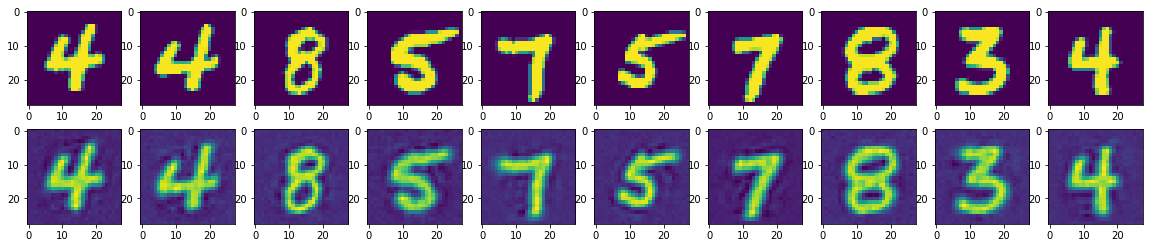

EPOCH: 201 LOSS: 0.006445716027058458
EPOCH: 202 LOSS: 0.0063389047440853925
EPOCH: 203 LOSS: 0.006473689340054989
EPOCH: 204 LOSS: 0.006296218473393002
EPOCH: 205 LOSS: 0.006304704249566777
EPOCH: 206 LOSS: 0.006275757058152085
EPOCH: 207 LOSS: 0.00640493970176032
EPOCH: 208 LOSS: 0.006260366626898122
EPOCH: 209 LOSS: 0.006221032728150976
EPOCH: 210 LOSS: 0.006225633765748941
EPOCH: 211 LOSS: 0.006328778190009011
EPOCH: 212 LOSS: 0.006183537167288322
EPOCH: 213 LOSS: 0.00625084519712
EPOCH: 214 LOSS: 0.006180955523299308
EPOCH: 215 LOSS: 0.00614868569737453
EPOCH: 216 LOSS: 0.006269391640114899
EPOCH: 217 LOSS: 0.006137133876238364
EPOCH: 218 LOSS: 0.006113872865896896
EPOCH: 219 LOSS: 0.0062215870686506474
EPOCH: 220 LOSS: 0.006076504143026194
EPOCH: 221 LOSS: 0.006146836183619141
EPOCH: 222 LOSS: 0.006074293304102424
EPOCH: 223 LOSS: 0.0060998271779243735
EPOCH: 224 LOSS: 0.006048759803063964
EPOCH: 225 LOSS: 0.006153611138035528


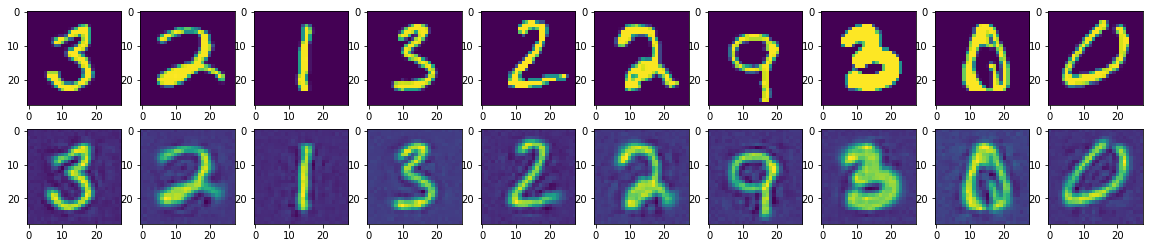

EPOCH: 226 LOSS: 0.006002930998089698
EPOCH: 227 LOSS: 0.005996945515132504
EPOCH: 228 LOSS: 0.006163568241022975
EPOCH: 229 LOSS: 0.006006797371035228
EPOCH: 230 LOSS: 0.0059578606713807485
EPOCH: 231 LOSS: 0.005963259114491972
EPOCH: 232 LOSS: 0.005945260471109647
EPOCH: 233 LOSS: 0.0060131482632393065
EPOCH: 234 LOSS: 0.0059115264394264564
EPOCH: 235 LOSS: 0.006037995794309619
EPOCH: 236 LOSS: 0.005889364398629125
EPOCH: 237 LOSS: 0.0058796127235181015
EPOCH: 238 LOSS: 0.006076167513173623
EPOCH: 239 LOSS: 0.005850018185303837
EPOCH: 240 LOSS: 0.005832982099426737
EPOCH: 241 LOSS: 0.005922709137476126
EPOCH: 242 LOSS: 0.005838212152546058
EPOCH: 243 LOSS: 0.005851279227877331
EPOCH: 244 LOSS: 0.005809751089886238
EPOCH: 245 LOSS: 0.005930164181296536
EPOCH: 246 LOSS: 0.005768804712974227
EPOCH: 247 LOSS: 0.005850866467493479
EPOCH: 248 LOSS: 0.005769377323681784
EPOCH: 249 LOSS: 0.00589358963230065
EPOCH: 250 LOSS: 0.0057361537318351


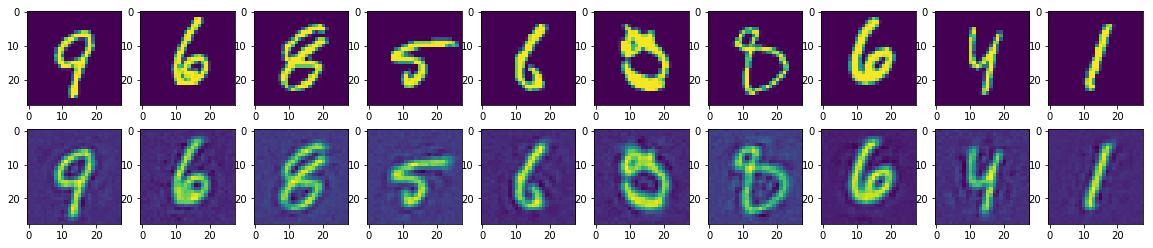

EPOCH: 251 LOSS: 0.005743501721906776
EPOCH: 252 LOSS: 0.005780456128372439
EPOCH: 253 LOSS: 0.005759100221056756
EPOCH: 254 LOSS: 0.0057813786568191375
EPOCH: 255 LOSS: 0.0057005465788960135
EPOCH: 256 LOSS: 0.005720396387477309
EPOCH: 257 LOSS: 0.005674298558781137
EPOCH: 258 LOSS: 0.005840140849077066
EPOCH: 259 LOSS: 0.005631287932100762
EPOCH: 260 LOSS: 0.005774849782764016
EPOCH: 261 LOSS: 0.005626602588180717
EPOCH: 262 LOSS: 0.005616745200323684
EPOCH: 263 LOSS: 0.005664807544573327
EPOCH: 264 LOSS: 0.005624618136980494
EPOCH: 265 LOSS: 0.00573012777324257
EPOCH: 266 LOSS: 0.005582380032197374
EPOCH: 267 LOSS: 0.005657741798678301
EPOCH: 268 LOSS: 0.005572899401218432
EPOCH: 269 LOSS: 0.0056054723828196365
EPOCH: 270 LOSS: 0.005592889877677453
EPOCH: 271 LOSS: 0.005605450258819295
EPOCH: 272 LOSS: 0.005542500366970815
EPOCH: 273 LOSS: 0.00553647814639157
EPOCH: 274 LOSS: 0.0057313121941775244
EPOCH: 275 LOSS: 0.005496328921805396


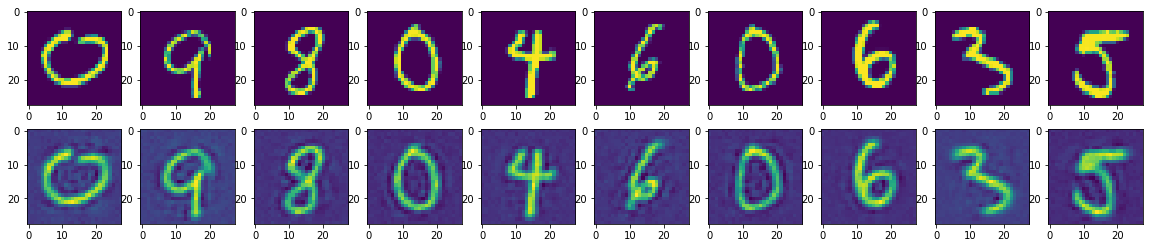

EPOCH: 276 LOSS: 0.005489409747253595
EPOCH: 277 LOSS: 0.0054604621576094395
EPOCH: 278 LOSS: 0.005790418412159782
EPOCH: 279 LOSS: 0.005456378626194401
EPOCH: 280 LOSS: 0.005440546331998429
EPOCH: 281 LOSS: 0.005428342614322901
EPOCH: 282 LOSS: 0.00548813389130751
EPOCH: 283 LOSS: 0.005582632498225309
EPOCH: 284 LOSS: 0.005421230028754945
EPOCH: 285 LOSS: 0.005430293568445604
EPOCH: 286 LOSS: 0.005400033634603838
EPOCH: 287 LOSS: 0.005648235249704594
EPOCH: 288 LOSS: 0.005400162701662935
EPOCH: 289 LOSS: 0.005374943711565899
EPOCH: 290 LOSS: 0.0053641778936029455
EPOCH: 291 LOSS: 0.005416594160710528
EPOCH: 292 LOSS: 0.005445246173761012
EPOCH: 293 LOSS: 0.005366260096776844
EPOCH: 294 LOSS: 0.005352407541187083
EPOCH: 295 LOSS: 0.0054832295529910775
EPOCH: 296 LOSS: 0.005332592031231425
EPOCH: 297 LOSS: 0.005303674227369776
EPOCH: 298 LOSS: 0.005461279544572198
EPOCH: 299 LOSS: 0.005293066969619748
EPOCH: 300 LOSS: 0.005319618248467237


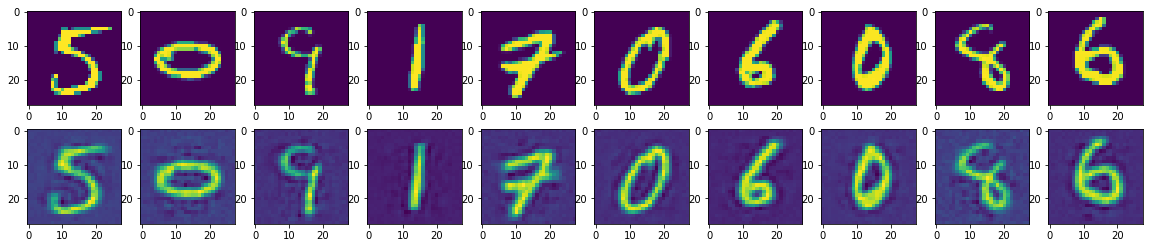

EPOCH: 301 LOSS: 0.005337914708961066
EPOCH: 302 LOSS: 0.005365612666005564
EPOCH: 303 LOSS: 0.005280025598537075
EPOCH: 304 LOSS: 0.005401327016463127
EPOCH: 305 LOSS: 0.005245360487288302
EPOCH: 306 LOSS: 0.005244931458022262
EPOCH: 307 LOSS: 0.0054267035005868625
EPOCH: 308 LOSS: 0.005220975921504566
EPOCH: 309 LOSS: 0.0052137760702479895
EPOCH: 310 LOSS: 0.005214945436073619
EPOCH: 311 LOSS: 0.005487831430306118
EPOCH: 312 LOSS: 0.005180426220577516
EPOCH: 313 LOSS: 0.005185610864087532
EPOCH: 314 LOSS: 0.005187297929485476
EPOCH: 315 LOSS: 0.005324272835840945
EPOCH: 316 LOSS: 0.005165284396469837
EPOCH: 317 LOSS: 0.005152158818304376
EPOCH: 318 LOSS: 0.005332910384514619
EPOCH: 319 LOSS: 0.005137498775507257
EPOCH: 320 LOSS: 0.005138696357098922
EPOCH: 321 LOSS: 0.005137117531232006
EPOCH: 322 LOSS: 0.005324083842245526
EPOCH: 323 LOSS: 0.005110598128553623
EPOCH: 324 LOSS: 0.005137484814574728
EPOCH: 325 LOSS: 0.005196269306410206


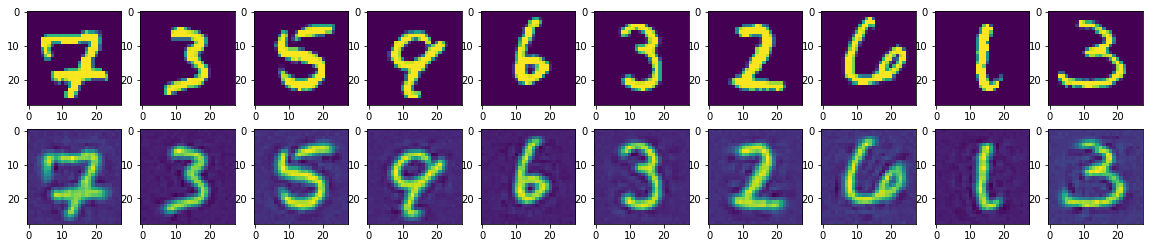

EPOCH: 326 LOSS: 0.005106810834055227
EPOCH: 327 LOSS: 0.00513984762320468
EPOCH: 328 LOSS: 0.005203195230506076
EPOCH: 329 LOSS: 0.0050756051726741054
EPOCH: 330 LOSS: 0.005128948633747348
EPOCH: 331 LOSS: 0.005149666315372117
EPOCH: 332 LOSS: 0.005064276991096513
EPOCH: 333 LOSS: 0.005239812893884592
EPOCH: 334 LOSS: 0.005044301300019515
EPOCH: 335 LOSS: 0.005064042876703573
EPOCH: 336 LOSS: 0.005046770219624938
EPOCH: 337 LOSS: 0.005063085491092153
EPOCH: 338 LOSS: 0.005144395864227675
EPOCH: 339 LOSS: 0.005009454776802675
EPOCH: 340 LOSS: 0.005074451585895702
EPOCH: 341 LOSS: 0.005110074582769245
EPOCH: 342 LOSS: 0.00498064083067568
EPOCH: 343 LOSS: 0.004984548172908402
EPOCH: 344 LOSS: 0.005259177144973086
EPOCH: 345 LOSS: 0.004971131888508308
EPOCH: 346 LOSS: 0.004949240375289826
EPOCH: 347 LOSS: 0.004970768479314821
EPOCH: 348 LOSS: 0.005159415333923665
EPOCH: 349 LOSS: 0.0049499106743561274
EPOCH: 350 LOSS: 0.004932673356643384


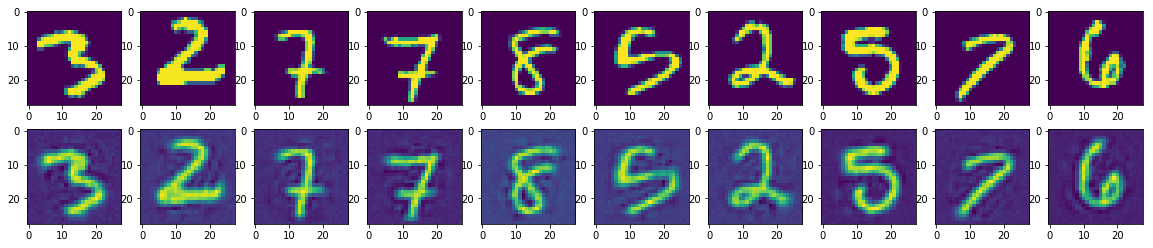

EPOCH: 351 LOSS: 0.0049179680187438355
EPOCH: 352 LOSS: 0.005112679125588449
EPOCH: 353 LOSS: 0.0049163502643566805
EPOCH: 354 LOSS: 0.004911407838509382
EPOCH: 355 LOSS: 0.005047582729867166
EPOCH: 356 LOSS: 0.004900167741980709
EPOCH: 357 LOSS: 0.004982665925454654
EPOCH: 358 LOSS: 0.004917247298484047
EPOCH: 359 LOSS: 0.0049146080537205514
EPOCH: 360 LOSS: 0.005040479658548135
EPOCH: 361 LOSS: 0.004888788017042266
EPOCH: 362 LOSS: 0.004879464325367834
EPOCH: 363 LOSS: 0.004982023541891917
EPOCH: 364 LOSS: 0.004893360683653768
EPOCH: 365 LOSS: 0.0048410737647832745
EPOCH: 366 LOSS: 0.0049345366748385746
EPOCH: 367 LOSS: 0.004880489083006978
EPOCH: 368 LOSS: 0.004898245384041322
EPOCH: 369 LOSS: 0.005057037105692215
EPOCH: 370 LOSS: 0.004814562769454034
EPOCH: 371 LOSS: 0.004805189638800634
EPOCH: 372 LOSS: 0.004806752768319731
EPOCH: 373 LOSS: 0.004981923517592943
EPOCH: 374 LOSS: 0.00479522084338906
EPOCH: 375 LOSS: 0.004800597163772241


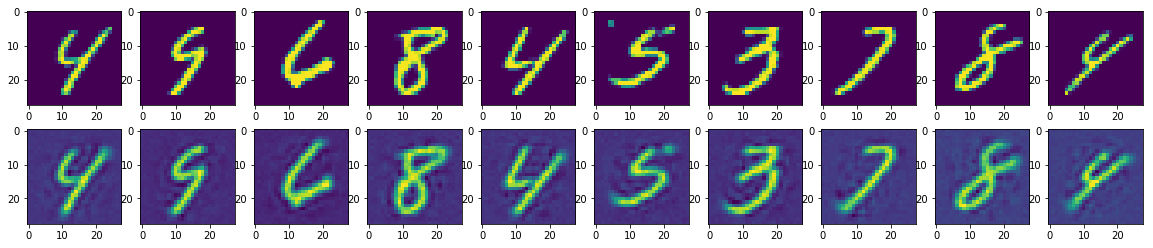

EPOCH: 376 LOSS: 0.004957099581300153
EPOCH: 377 LOSS: 0.004763950863496853
EPOCH: 378 LOSS: 0.004793402766859759
EPOCH: 379 LOSS: 0.004898298818037891
EPOCH: 380 LOSS: 0.004761137867275157
EPOCH: 381 LOSS: 0.004874497412861696
EPOCH: 382 LOSS: 0.004759944080950214
EPOCH: 383 LOSS: 0.004836198310189641
EPOCH: 384 LOSS: 0.004753046624535501
EPOCH: 385 LOSS: 0.004827389181871476
EPOCH: 386 LOSS: 0.004851340750089842
EPOCH: 387 LOSS: 0.004718536028862407
EPOCH: 388 LOSS: 0.004740626119901655
EPOCH: 389 LOSS: 0.0048606879716545665
EPOCH: 390 LOSS: 0.00470801741724498
EPOCH: 391 LOSS: 0.004721239934385312
EPOCH: 392 LOSS: 0.004920603778681468
EPOCH: 393 LOSS: 0.004691754079734285
EPOCH: 394 LOSS: 0.004683257748571331
EPOCH: 395 LOSS: 0.004840717172565682
EPOCH: 396 LOSS: 0.004676155986447559
EPOCH: 397 LOSS: 0.004669922085916572
EPOCH: 398 LOSS: 0.00483126397997833
EPOCH: 399 LOSS: 0.004666018279401656
EPOCH: 400 LOSS: 0.004797154464987946


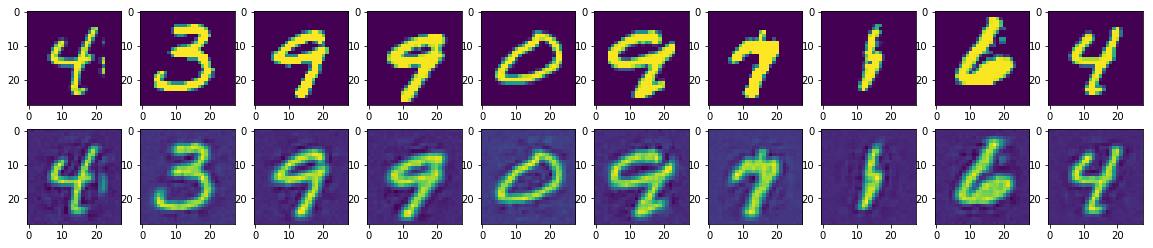

EPOCH: 401 LOSS: 0.004668647048058487
EPOCH: 402 LOSS: 0.004641916149911659
EPOCH: 403 LOSS: 0.0048665859420972115
EPOCH: 404 LOSS: 0.004637234989309408
EPOCH: 405 LOSS: 0.004638817142237161
EPOCH: 406 LOSS: 0.004609248701411763
EPOCH: 407 LOSS: 0.004792251091073852
EPOCH: 408 LOSS: 0.004610851053352076
EPOCH: 409 LOSS: 0.004735764325978082
EPOCH: 410 LOSS: 0.004641339611618327
EPOCH: 411 LOSS: 0.004680398802013427
EPOCH: 412 LOSS: 0.004630314491567065
EPOCH: 413 LOSS: 0.004605445602420168
EPOCH: 414 LOSS: 0.004713113349735167
EPOCH: 415 LOSS: 0.00457397918344114
EPOCH: 416 LOSS: 0.004810239858874451
EPOCH: 417 LOSS: 0.004576274995371455
EPOCH: 418 LOSS: 0.004571567191564239
EPOCH: 419 LOSS: 0.004556207285298269
EPOCH: 420 LOSS: 0.004802779723315047
EPOCH: 421 LOSS: 0.004552504856933336
EPOCH: 422 LOSS: 0.004548397443201291
EPOCH: 423 LOSS: 0.004544505701893992
EPOCH: 424 LOSS: 0.004696546445595599
EPOCH: 425 LOSS: 0.004559638939258424


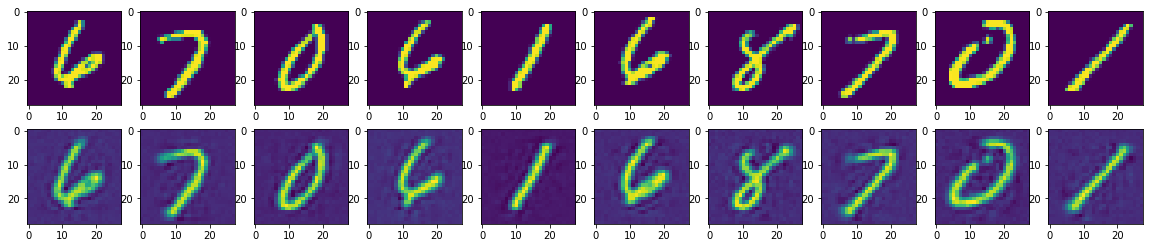

EPOCH: 426 LOSS: 0.004593920220921192
EPOCH: 427 LOSS: 0.00459870772405726
EPOCH: 428 LOSS: 0.0046483971168353256
EPOCH: 429 LOSS: 0.004517795082914536
EPOCH: 430 LOSS: 0.004573822675445855
EPOCH: 431 LOSS: 0.004586911667392798
EPOCH: 432 LOSS: 0.004550990646023079
EPOCH: 433 LOSS: 0.0045424629705118355
EPOCH: 434 LOSS: 0.00459799745954736
EPOCH: 435 LOSS: 0.0044943814641729895
EPOCH: 436 LOSS: 0.004672937557009644
EPOCH: 437 LOSS: 0.0044789250158893115
EPOCH: 438 LOSS: 0.004484503554139551
EPOCH: 439 LOSS: 0.004564828449310583
EPOCH: 440 LOSS: 0.004534257111480571
EPOCH: 441 LOSS: 0.004549972347843924
EPOCH: 442 LOSS: 0.00449165261269145
EPOCH: 443 LOSS: 0.004504911391614157
EPOCH: 444 LOSS: 0.004523843828374978
EPOCH: 445 LOSS: 0.004516394394119092
EPOCH: 446 LOSS: 0.004450686881573148
EPOCH: 447 LOSS: 0.004712109803858269
EPOCH: 448 LOSS: 0.004441675983237032
EPOCH: 449 LOSS: 0.004422336024145692
EPOCH: 450 LOSS: 0.004449604730544195


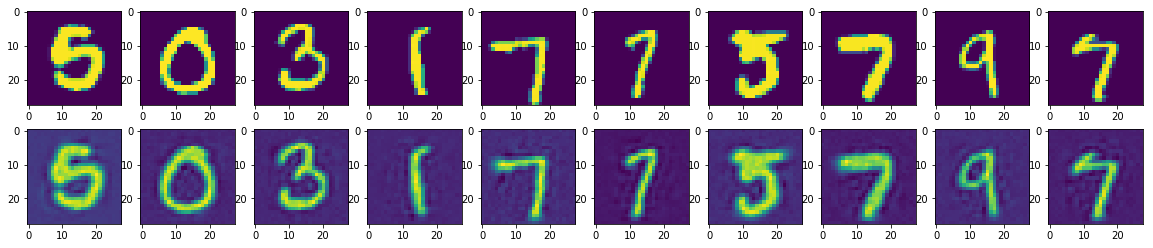

EPOCH: 451 LOSS: 0.004526104428169262
EPOCH: 452 LOSS: 0.004455355948977213
EPOCH: 453 LOSS: 0.004532664824694476
EPOCH: 454 LOSS: 0.004414030495786764
EPOCH: 455 LOSS: 0.004424150164183127
EPOCH: 456 LOSS: 0.004514165964394889
EPOCH: 457 LOSS: 0.0043957425533320575
EPOCH: 458 LOSS: 0.004536457483203766
EPOCH: 459 LOSS: 0.004397267296330117
EPOCH: 460 LOSS: 0.004473081246639292
EPOCH: 461 LOSS: 0.004507085494188175
EPOCH: 462 LOSS: 0.004380846265041844
EPOCH: 463 LOSS: 0.004404419596698848
EPOCH: 464 LOSS: 0.00446685131059074
EPOCH: 465 LOSS: 0.004471541101194389
EPOCH: 466 LOSS: 0.004392952212931517
EPOCH: 467 LOSS: 0.004354739559132382
EPOCH: 468 LOSS: 0.004486749209514488
EPOCH: 469 LOSS: 0.004400895288865505
EPOCH: 470 LOSS: 0.00436654903473017
EPOCH: 471 LOSS: 0.004439714475397448
EPOCH: 472 LOSS: 0.004350479075155868
EPOCH: 473 LOSS: 0.004454676357041942
EPOCH: 474 LOSS: 0.0043523878996550545
EPOCH: 475 LOSS: 0.0044233622175738055


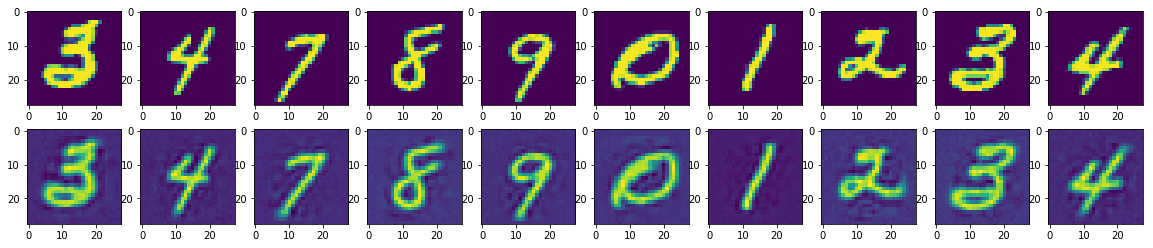

EPOCH: 476 LOSS: 0.004378834573928613
EPOCH: 477 LOSS: 0.00431732654881974
EPOCH: 478 LOSS: 0.004461068282148145
EPOCH: 479 LOSS: 0.004326884863806553
EPOCH: 480 LOSS: 0.004408582258725264
EPOCH: 481 LOSS: 0.004322929454132752
EPOCH: 482 LOSS: 0.00437441168167206
EPOCH: 483 LOSS: 0.004525622253718435
EPOCH: 484 LOSS: 0.004294447196886717
EPOCH: 485 LOSS: 0.004284965429108977
EPOCH: 486 LOSS: 0.004287726666951358
EPOCH: 487 LOSS: 0.004446725981294742
EPOCH: 488 LOSS: 0.0042869346171790544
EPOCH: 489 LOSS: 0.004286949730177965
EPOCH: 490 LOSS: 0.00436744335949767
EPOCH: 491 LOSS: 0.004277939071670134
EPOCH: 492 LOSS: 0.004449456108891777
EPOCH: 493 LOSS: 0.004261209778335007
EPOCH: 494 LOSS: 0.004253455054757944
EPOCH: 495 LOSS: 0.004393661250945567
EPOCH: 496 LOSS: 0.004279573631213337
EPOCH: 497 LOSS: 0.004257252957682059
EPOCH: 498 LOSS: 0.004348916771358561
EPOCH: 499 LOSS: 0.004288567963585542


In [19]:
num_epochs = 500 # Brings the loss near convergence. Output is not visibly changing anymore, but you can go higher
batch_size = 150 # the bacthes of images we want to feed into the model at a time

with tf.Session() as sess:
    
    sess.run(init)
    #saver.restore(sess, "./example_stacked_autoencoder.ckpt")
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        train_loss = 0 # The loss in this epoch
        
        for i in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(train, feed_dict={X: X_batch})
            
            train_loss += sess.run(loss, feed_dict={X: X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch, train_loss/num_batches))
        train_loss = 0
        
        # Take a random batch with size 10 of the test_images -> predict it's "simpler version" -> plot it out for visualization
        if epoch%25 == 0:
            num_test_images = 10
            rand_index = np.random.randint(0, mnist.test.num_examples-num_test_images)
            
            results = sess.run(output, feed_dict={X: mnist.test.images[rand_index:rand_index+num_test_images]})
            
            # Compare original images with their reconstructions
            f, a = plt.subplots(2, 10, figsize=(20, 4))
            for i in range(num_test_images):
                a[0][i].imshow(np.reshape(mnist.test.images[i+rand_index], (28, 28)))
                a[1][i].imshow(np.reshape(results[i], (28, 28)))
            plt.show()
        
    saver.save(sess, "./example_stacked_autoencoder.ckpt")

## Test Autoencoder output on Test Data

Take a random batch with size 10 of the test_images -> predict it's "simpler version" -> plot it out for visualization

Here I'm also just running the decoder, because I want to see how the image looks like after the model encoded it

In [20]:
num_test_images = 10

rand_index = np.random.randint(0, mnist.test.num_examples-num_test_images)
print(rand_index)

with tf.Session() as sess:
    
    saver.restore(sess, "./example_stacked_autoencoder.ckpt")
    
    results = sess.run(hid_layer2, feed_dict={X: mnist.test.images[rand_index:rand_index+num_test_images]})
    results_decode = sess.run(output_decode, feed_dict={X_decode: results})
print(results.shape)

441
INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt
(10, 196)


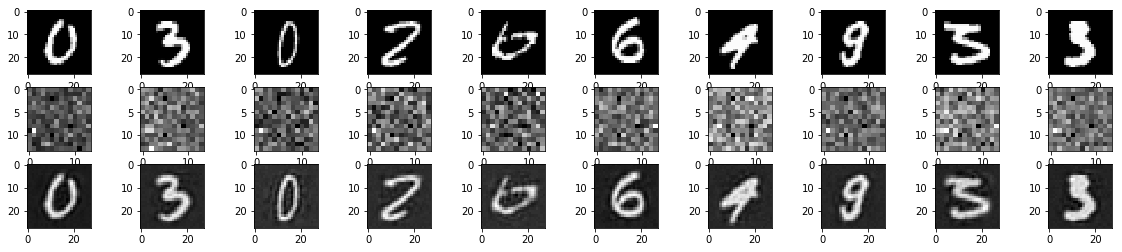

In [21]:
# Compare original images with their reconstructions and encoded
f, a = plt.subplots(3, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i+rand_index], (28, 28)), cmap="gray")
    a[1][i].imshow(np.reshape(results[i], (14, 14)), cmap="gray")
    a[2][i].imshow(np.reshape(results_decode[i], (28, 28)), cmap="gray")

#### The first row is the actual input image
#### The second row is the encoded image
#### The third row is the decoded image

---

The encoded image looks pretty random noisy. It's impressive the model can still reconstruct the input image from this, right?